In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
import matplotlib.pyplot as plt 

In [3]:
data = np.genfromtxt("fuel_data.csv", delimiter = ',') 
X = data.T[0:7].T 
Y = data.T[-1].T 

#Y = np.log(Y) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 42) 


print np.shape(X_train) 
print np.shape(X_test) 
print np.shape(Y_train) 
print np.shape(Y_test) 

(294L, 7L)
(98L, 7L)
(294L,)
(98L,)


In [10]:
cv = [] 
neurons = [] 
for i in range(2,20): 
    ann=MLPRegressor(hidden_layer_sizes=(i,), activation='relu', solver='lbfgs', batch_size='auto', power_t=0.5, max_iter=1000, shuffle= True, random_state=42, tol=0.001, verbose=False, warm_start=True, validation_fraction=0.4)
    cv.append(np.mean(cross_val_score(ann, X, Y, cv = 4))) 
    neurons.append(i)                   

0.840509131612
12


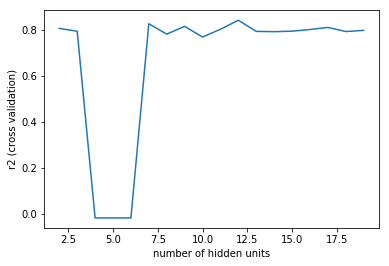

In [20]:
print max(cv)     
print neurons[cv.index(max(cv))]        
plt.plot(neurons, cv) 
plt.xlabel('number of hidden units')
plt.ylabel('r2 (cross validation)')
#plt.ylim((0,1))  
plt.show()   

In [12]:
ann=MLPRegressor(hidden_layer_sizes=(12,), activation='relu', solver='lbfgs', batch_size='auto', power_t=0.5, max_iter=1000, random_state= 42, tol=0.001)

In [13]:
ann.fit(X_train,Y_train)        

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
Y_pred = ann.predict(X_test)  
Y_pred_train = ann.predict(X_train)  
print Y_pred_train[30:40]  
print Y_train[30:40] 

[ 16.2458086   14.53678378  24.10856859  31.10845635  32.70170841
  24.64860268  33.2440762   17.73737178  16.59894023  19.14568346]
[ 18.   14.   24.3  34.   32.   27.9  34.5  16.   16.   21. ]


In [15]:
np.mean(cross_val_score(ann, X, Y))          

0.8251032532332484

In [10]:
r2 = [] 
neurons = []
r2_test = [] 
for i in range(1,50):
    ann=MLPRegressor(hidden_layer_sizes=(i,), activation='relu', solver='lbfgs', alpha=10, batch_size='auto', power_t=0.5, max_iter=1000, shuffle= True, random_state=None, tol=0.0001, verbose=False, warm_start=True, validation_fraction=0.4)
    ann.fit(X_train,Y_train)     
    Y_pred = ann.predict(X_test)  
    Y_pred_train = ann.predict(X_train)
    r2.append(r2_score(Y_train,Y_pred_train)) 
    r2_test.append(r2_score(Y_test,Y_pred))
    neurons.append(i)  

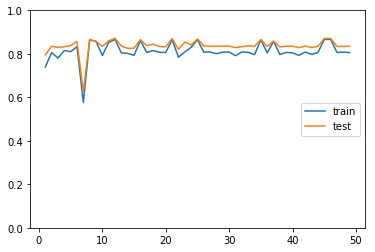

46
12


In [11]:
plt.plot(neurons,r2, label = 'train')
plt.plot(neurons,r2_test, label = 'test')
plt.ylim((0,1))
plt.legend(loc = 'center right')   
plt.show() 
print neurons[r2.index(max(r2))]
print neurons[r2_test.index(max(r2_test))]

In [ ]:
#Y_pred = np.tan(Y_pred)
#Y_pred_train = np.tan(Y_pred_train)
#Y_train = np.tan(Y_train) 
#Y_test = np.tan(Y_test)

In [ ]:
#Y_pred = np.exp(Y_pred)
#Y_pred_train = np.exp(Y_pred_train)
#Y_train = np.exp(Y_train) 
#Y_test = np.exp(Y_test)

In [16]:
print("Mean squared error (train): %.8f"
     % mean_squared_error(Y_train,Y_pred_train)) 

print("R2(train): %.2f"
      % r2_score(Y_train,Y_pred_train)) 

Mean squared error (train): 8.59174989
R2(train): 0.86


In [17]:
print("Mean squared error (test): %.8f"
      % mean_squared_error(Y_test,Y_pred)) 
print("R2(test): %.2f"
      % r2_score(Y_test,Y_pred))  

Mean squared error (test): 8.10065913
R2(test): 0.87


In [18]:
def max_abs_error(data1,data2):
    Y_error = []
    for i in range(len(data1)):
        Y_error.append(100*(abs(data1[i] - data2[i])/data1[i]))
    return Y_error

In [19]:
MAE_test = max_abs_error(Y_test, Y_pred)
MAE_train = max_abs_error(Y_train, Y_pred_train)
print max(MAE_test)
print max(MAE_train) 

57.8545416923
50.079604622


In [16]:
#metrics.mean_absolute_error(y_test, y_pred)

print("mean_absolute_error(test): %.2f"
      % mean_absolute_error(Y_test, Y_pred))

print("mean_absolute_error(train): %.2f"
      % mean_absolute_error(Y_train, Y_pred_train))   

mean_absolute_error(test): 2.43
mean_absolute_error(train): 2.55
